# <span style="color:navy"> Exercise 3 </span>


## 3.1 - Plain vanilla option pricing

The purpose of this exercise is computing the asset price of a European option using a Monte Carlo method.

The theoretical base lies on the Black-Scholes theory, which assumes that the asset price behaves like a geometric Brownian motion (GBM):


fixing the risk-free interest rate $r$ and volatility $\sigma$ as constants.

First of all, we define and set all the option parameters:

- Asset price at $t=0; S(0)=100$
- Delivery time: $T=1$
- Strike price: $K=100$
- Risk-free interest rate: $r=0.1$
- Volatility: $\sigma=0.25$

Then, in order to calculate the time evolution of the price, we can proceed in two ways:

a) Direct Sampling of the Final Price at $t=T$, using the following formula:

$S(T)=S(0)\exp{[(\mu-\frac{1}{2}\sigma^{2})T+\sigma W(T)]} $


where $S(0)$ is the initial price, the mean $\mu=r$ and $$W(T)$ is the Wiener process function which is sampled by a normal distribution.

a) Discretized Sampling by dividing the time interval $[0,T]$ into 100 sub-intervals and evaluating the price at each step; so the recursive formula is:

$S(t_{i})=S(t_{i})\exp{[(\mu-\frac{1}{2}\sigma^{2})(t_{i+1}-t_{i})+\sigma Z_{i+1}\sqrt{t_{i+1}-t_{i}}]} $

with $Z_{i}= \N(0,1)$

Given the asset price at delivery time $S(T)$, we can now evaluate the call and put value at the initial time, as follows:

Call profit: $C(0)=max[0, S(T)-K]e^{-rT} $

Put profit: $P(0)=max[0, K-S(T)]e^{-rT} $

where $e^{-rT}$ shows the time relation between a call (put) at initial and delivery time.

Having chosen the European option, we can also check the quality of the sampling by comparing with the Black-Scholes (BS) analytic solution.

$C_{real}(0)=14.975790778311286 $

$P_{real}(0)=5.4595325819072364 $

In [1]:
import matplotlib
import matplotlib.pyplot as plt 
import numpy as np
import math

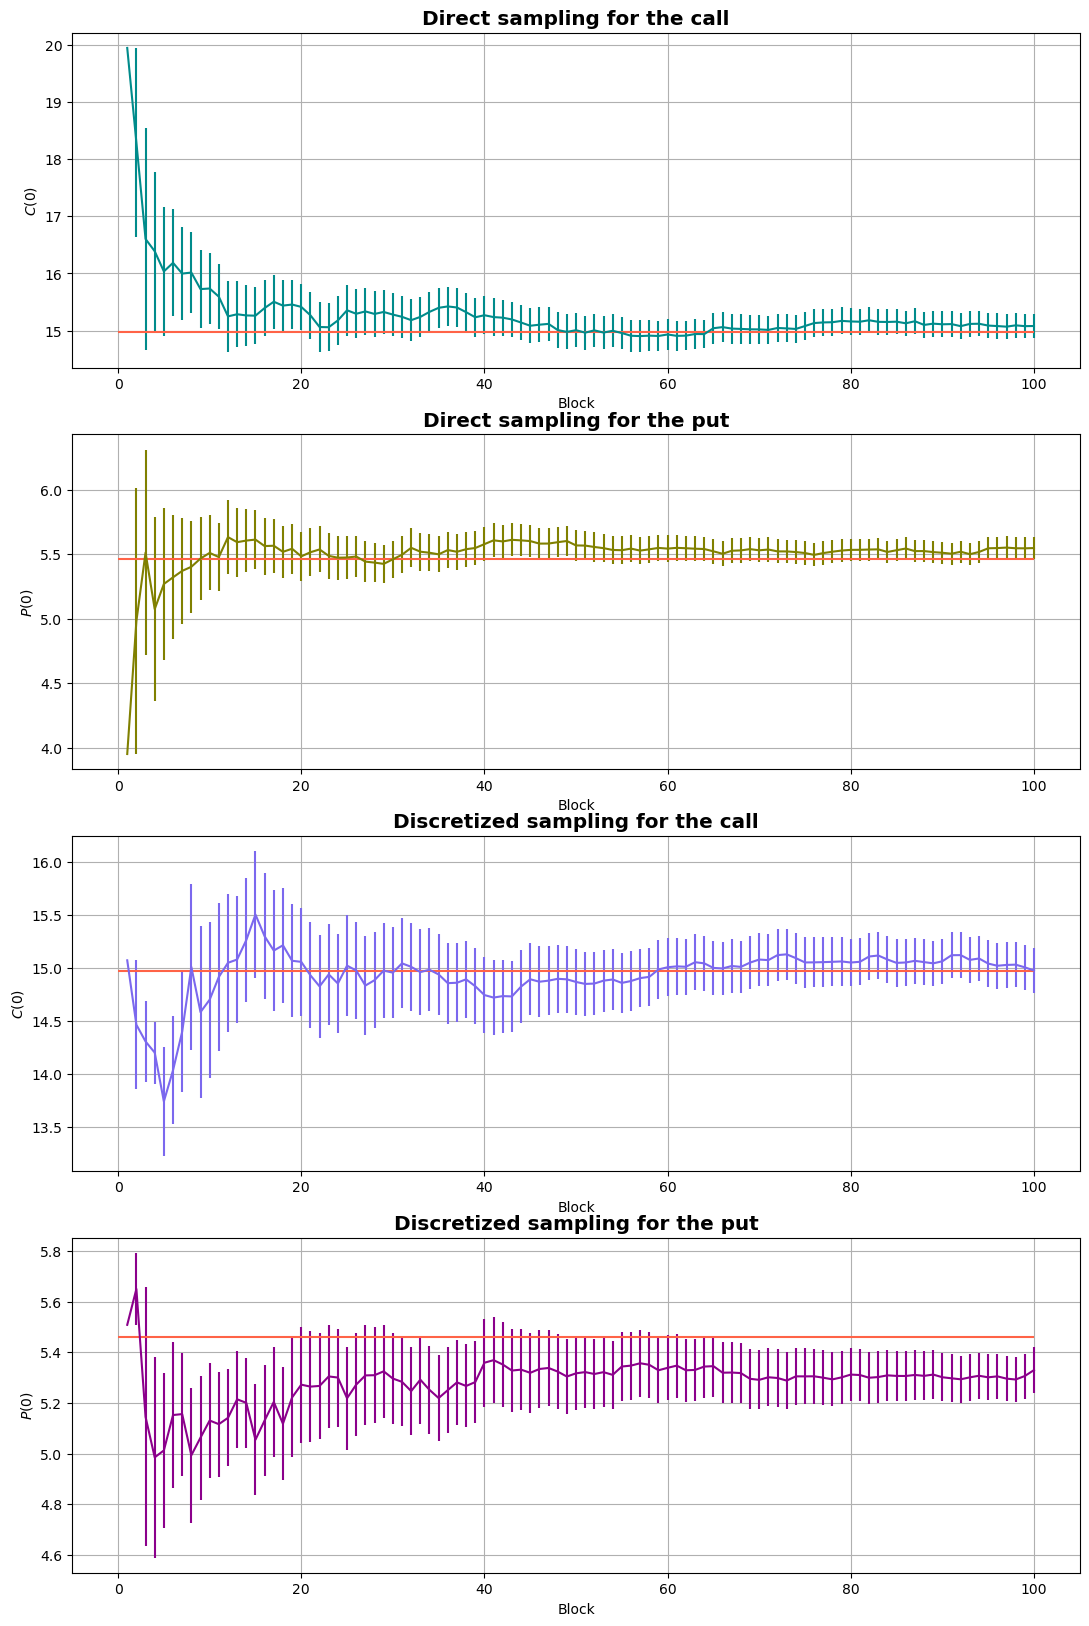

In [6]:
x1,y1,err1=np.loadtxt("CallDirect.out",usecols=(0,1,2),unpack=True)
x2,y2,err2=np.loadtxt("PutDirect.out",usecols=(0,1,2),unpack=True)
x3,y3,err3=np.loadtxt("CallDiscrete.out",usecols=(0,1,2),unpack=True)
x4,y4,err4=np.loadtxt("PutDiscrete.out",usecols=(0,1,2),unpack=True)

fig=plt.figure(figsize=(13, 20))

plt.subplot(411)
plt.errorbar(x1,y1,yerr=err1, color='darkcyan')
plt.hlines(14.975790778311286, 0, 100, color='tomato')
plt.xlabel('Block')
plt.ylabel('$C(0)$')
plt.title("Direct sampling for the call",size='x-large', fontweight='bold')
plt.grid(True)

plt.subplot(412)
plt.errorbar(x2,y2,yerr=err2, color='olive')
plt.hlines(5.4595325819072364, 0, 100, color='tomato')
plt.xlabel('Block')
plt.ylabel('$P(0)$')
plt.title("Direct sampling for the put",size='x-large', fontweight='bold')
plt.grid(True)

plt.subplot(413)
plt.errorbar(x3,y3,yerr=err3, color='mediumslateblue')
plt.hlines(14.975790778311286, 0, 100, color='tomato')
plt.xlabel('Block')
plt.ylabel('$C(0)$')
plt.title("Discretized sampling for the call",size='x-large', fontweight='bold')
plt.grid(True)

plt.subplot(414)
plt.errorbar(x4,y4,yerr=err4, color='darkmagenta')
plt.hlines(5.4595325819072364, 0, 100, color='tomato')
plt.xlabel('Block')
plt.ylabel('$P(0)$')
plt.title("Discretized sampling for the put",size='x-large', fontweight='bold')
plt.grid(True)

plt.grid(True)
plt.show()